

 Fashion MNIST, HW3

Name: Urvashiben Thakkar

Honour code:"I pledge that on all academic work that I submit, I will neither give nor receive unauthorized aid, nor will I present another person's work as my own."


Hello World of DL - To classify MNIST hand written digits
To classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).
A set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s.
How to input image dataset to a network? - Concept

In [ ]:
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting

In [ ]:
import keras                                                                         # For building neural networks
from keras.datasets import fashion_mnist                                             # Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Import the Fashion MNIST dataset

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape) #Print the shape and data type of the training images
print(train_images.dtype) #uint8 - unsigned int 8 bits
print(test_images.shape)  # Print the shape of the test images

(60000, 28, 28)
uint8
(10000, 28, 28)


In [ ]:
print(train_images[0])   #Print the first training image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

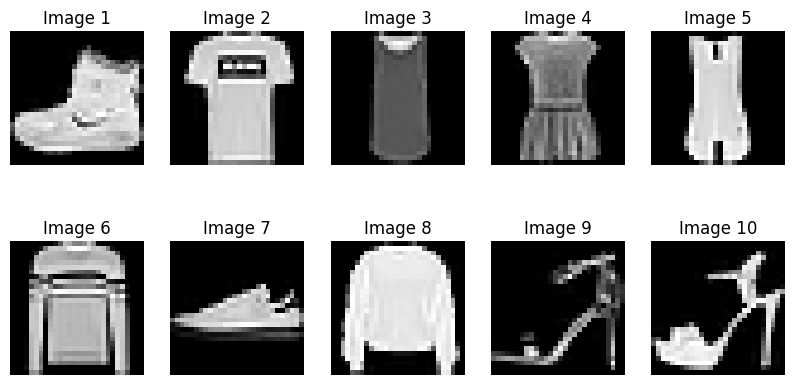

In [ ]:
# Show 10 images from train_images with grayscale color map
plt.figure(figsize=(10, 5)) #Assing plot size
for i in range(10): #for loop iteration 10 images
    plt.subplot(2, 5, i+1)  # Arrange images in 2 rows and 5 columns
    plt.imshow(train_images[i], cmap='gray')  # Use grayscale color map
    plt.title(f'Image {i+1}')  # Set title for each image
    plt.axis('off')  # Turn off axis
plt.show() #display plot


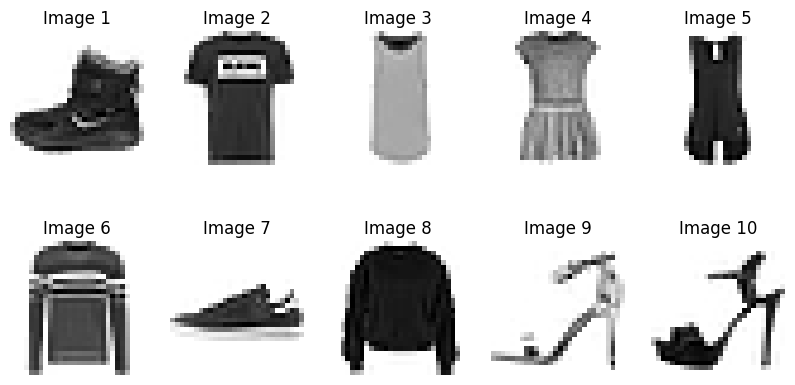

In [ ]:
# Show 10 images from train_images with binary color map
plt.figure(figsize=(10, 5)) #Assing plot size
for i in range(10): #for loop iteration 10 images
    plt.subplot(2, 5, i+1)  # Arrange images in 2 rows and 5 columns
    plt.imshow(train_images[i], cmap='binary')  # Use binary color map
    plt.title(f'Image {i+1}')  # Set title for each image
    plt.axis('off')  # Turn off axis
plt.show() #display plot


In [ ]:
fashion10_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # Define fashion class names

In [ ]:
from keras.models import Sequential                      # Import Sequential and Dense layers from Keras
from keras.layers import Dense                           # Dense - fully connected neural layer.

model = Sequential([                                     # Import Sequential and Dense layers from Keras
    Dense(512, activation='relu', input_shape=(28*28,)), # (n,): 1 dim. array
    # Can we use "input_dim = 28*28" instead of the input_shape ? YES
    Dense(10, activation='softmax')
    # softmax act func is recommended for the last layer muticlass classification
    # softmax layer returns an array of 10 probability scores (summing to 1)
])

In [ ]:
model.compile(                        # Compile the model
    optimizer='adam',
    #loss='categorical_crossentropy', # target labels are one-hot encoded.
                                 # Need to use to_categorical(). See below (*)
    loss='sparse_categorical_crossentropy', # target labels are integers
    metrics=['accuracy']                    # Specify accuracy.
)
model.summary()                              # Print the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Calculate the number of parameters in the model
print((28*28+1)*512+(512+1)*10)

407050


In [ ]:
# need to flatten images to feed to DNN. (If CNN, do not flatten)
train_images = train_images.reshape((60000, 28 * 28)) # (60000, 28, 28) # See the input "concept" cell above.
train_images = train_images.astype('float32') / 255
      # cast to a specified type. "as" type, then convert values between 0 and 1
      # TensorFlow neurons like [0,1) values!!!!
test_images2 = test_images.reshape((10000, 28 * 28)) # Flatten test images
test_images2 = test_images2.astype('float32') / 255

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.5062 - accuracy: 0.8208
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3772 - accuracy: 0.8655
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3332 - accuracy: 0.8798
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3063 - accuracy: 0.8873
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2869 - accuracy: 0.8953
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2712 - accuracy: 0.8997
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2579 - accuracy: 0.9042
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2477 - accuracy: 0.9086
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2362 - accuracy: 0.9120
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2248 - accura

In [ ]:
# Print the keys of the history object
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
# Extracting the training accuracy and loss
acc = history.history['accuracy']  # Training accuracy
loss = history.history['loss']     # Training loss
loss

[0.5062212944030762,
 0.3771796226501465,
 0.33315691351890564,
 0.3063022196292877,
 0.2868545353412628,
 0.2712131440639496,
 0.25787538290023804,
 0.2477203756570816,
 0.23623421788215637,
 0.22475655376911163,
 0.21908295154571533,
 0.21275660395622253,
 0.20051270723342896,
 0.19224035739898682,
 0.18793939054012299,
 0.18185803294181824,
 0.1732233166694641,
 0.172033429145813,
 0.16147656738758087,
 0.15571968257427216]

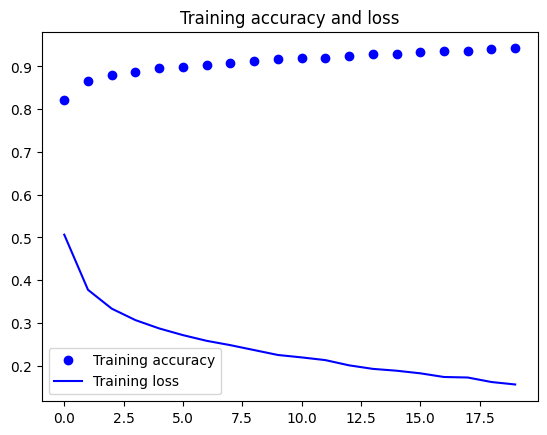

In [ ]:
# Plot training accuracy and loss
epoches = range(len(loss))
plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, loss, 'b', label='Training loss')
plt.title("Training accuracy and loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images2, test_labels) # unseen images

313/313 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8907


In [ ]:
print('test_loss:    ', test_loss)
print('test_accuracy:', test_acc)

test_loss:     0.33025026321411133
test_accuracy: 0.8906999826431274


In [ ]:
# Predict classes for test images
p = model.predict(test_images2, verbose=0) # test_images2 has converted images for Keras
#out = model.predict(np.array([test_images2[1]])) # or this way
print(p)

print(f"The digit is {p[0].argmax()}")

[[8.3622735e-09 1.1142289e-09 4.6370249e-10 ... 3.3779541e-04
  1.3294640e-08 9.9964666e-01]
 [6.4900763e-05 1.7863715e-13 9.9969912e-01 ... 1.6301506e-12
  4.3256540e-12 3.3882271e-15]
 [3.0605676e-12 9.9999994e-01 8.7835275e-15 ... 5.8424806e-23
  1.2716330e-17 4.9543915e-20]
 ...
 [6.2562816e-05 7.5949891e-13 3.2569606e-08 ... 1.5964444e-10
  9.9992651e-01 1.2698590e-15]
 [4.6972620e-10 9.9999923e-01 4.9905646e-11 ... 1.8419667e-14
  5.5412552e-10 4.3960628e-13]
 [5.7326339e-08 9.2022351e-10 1.2221695e-08 ... 6.6362563e-06
  9.7326188e-07 6.3210068e-09]]
The digit is 9


In [ ]:
# Present images and predictions
test_digits = test_images2               # Select test images
predictions = model.predict(test_digits) # Make predictions
predictions[:10]


313/313 [==============================] - 1s 2ms/step


array([[8.36227354e-09, 1.11422893e-09, 4.63702493e-10, 1.54781066e-11,
        3.02864933e-09, 1.55367798e-05, 7.77250486e-10, 3.37795413e-04,
        1.32946401e-08, 9.99646664e-01],
       [6.49007634e-05, 1.78637148e-13, 9.99699116e-01, 9.62680768e-11,
        1.29130785e-04, 6.13051403e-15, 1.06843894e-04, 1.63015055e-12,
        4.32565398e-12, 3.38822708e-15],
       [3.06056764e-12, 9.99999940e-01, 8.78352753e-15, 1.38015935e-11,
        8.96472458e-13, 2.58318101e-20, 2.71745625e-12, 5.84248057e-23,
        1.27163303e-17, 4.95439149e-20],
       [7.13636997e-11, 9.99999821e-01, 6.02576712e-12, 6.40345590e-08,
        2.80965962e-12, 8.77804893e-19, 4.65079114e-10, 8.22588338e-20,
        1.58933811e-15, 3.62511811e-16],
       [5.53940497e-02, 4.67832495e-10, 3.19577660e-03, 1.90468800e-05,
        2.89155229e-04, 2.17023644e-09, 9.41101789e-01, 6.65347173e-08,
        9.53876835e-08, 6.00373795e-08],
       [6.45327205e-08, 9.99999821e-01, 2.97595941e-11, 1.34764411e-09,
   

In [ ]:
# Present images and predictions

def plot_img_label(img, pred_class, pred_percentage, true_class):  # Show image in binary colormap

  plt.imshow(img,cmap=plt.cm.binary)

  if pred_class == true_class:                                     # If predicted class matches true class
    color = 'blue'                                                 # Set label color to blue
  else:
    color = 'red'                                                  # Set label color to red

  plt.title(label= f"Predicted: {pred_class} - {pred_percentage:2.1f}%\nActual: {true_class}",
            fontdict={'color': color})                             # Set title with predicted and actual class


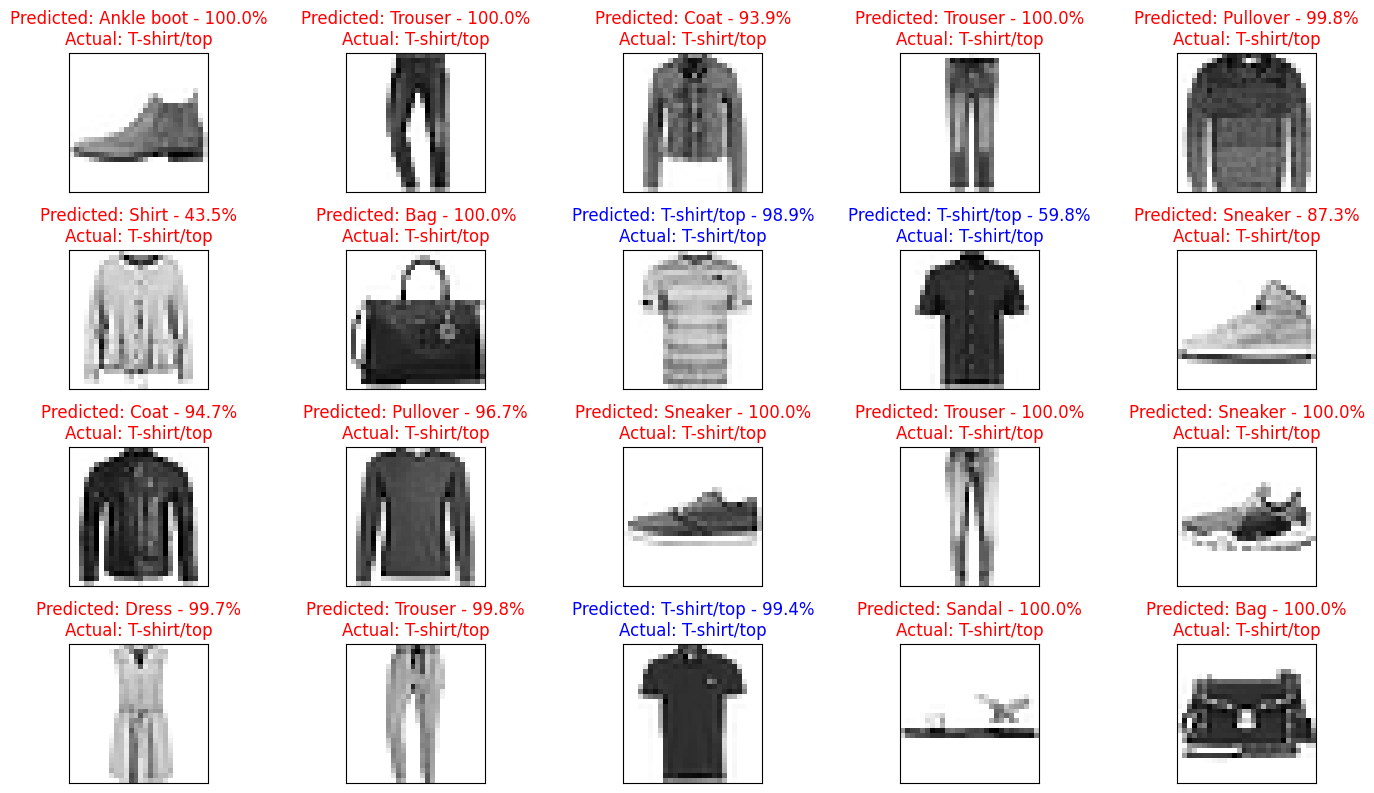

In [ ]:
# Plot images with labels and predictions
plt.figure(figsize=(14,10))   # Set figure size
for i in range(20):           # Loop over images

    plt.subplot(5,5,i+1)      # Create subplot
    plt.xticks([])            # Hide x ticks
    plt.yticks([])            # Hide y ticks
    plt.grid(False)           # Hide grid

    i = i * 5                 # Adjust index

    img = test_images[i].reshape(28,28)                     # Reshape image
    pred_class = fashion10_names[np.argmax(predictions[i])] # Predicted class
    pred_percentage = np.max(predictions[i])*100            # Predicted percentage
    true_class = fashion10_names[np.argmax(test_labels[i])] # True class

    plot_img_label(img, pred_class, pred_percentage, true_class) # Plot image with label

plt.tight_layout()  # Adjust layout
plt.show()          # Show plot





```
Analysis and Summary of Experiments

Fashion MNIST Loading Data: It is a new concept than ML and AI which I learnt in these subjects, and gather more knowlege like learnt from AL NLP and in ML K-nearest, K-means, dicision making and many more.Like I upload TXT file from Corus library like that way loaded dataset from Keras as I understood after this homework. Also,Explored the shape and data type of the training and test images. Apart from this, I learned How to use grayscale and binary color maps.

Build Model and train:

I learned new concept built a Sequential neural network model input layers for these I used reLU activation Function for hidden layer and Softmax for the output lyer.Compiled the model with the Adam optimizer and sparse categorical cross-entropy loss.Trained the model on training images and labels for 20 epochs with batch size 128.Lastly,	Monitored training accuracy and loss using Matplotlib plots.

Model Evaluation:
Evaluated the trained model on the test dataset to assess its performance.
Calculated the test loss and accuracy.

Predictions and Visualization:
using the trained model it shows predictions for test images. Selected test images create visualization for prediction and actual label.

Overall, experiment was good the Fashion MNIST dataset building and training a neural network model, evaluating its performance, and visualizing the predictions.






```

